#  Transformando DataFrame em GeoDataFrame



- Fonte de dados de shapefile do RJ: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/RJ/RJ.zip



![A test image](dados/originais/UTM_Brasil.png)



#### Conceitos
- $CRS$: Sistema de Referência de Coordenadas. (www.spatialreference.org)
- Estrutura:
    >crs={
        'proj': 'latlong',
        'ellps': 'WGS84',
        'datum': 'WGS84'
    }
- proj -> Projeção: Representação bidimensional do globo terrestre. Tipo de projeção: cilíndrica, cônica, plana
- ellps -> Elipse: Modelo que descreve melhor a forma da Terra
- datum -> O datum fornece as informações necessárias para ancorar as coordenadas abstratas na Terra. O datum define o ponto de origem dos eixos coordenados e define a direção dos eixos.
    - WGS84: é o Datum utilizado pelos sistemas de GPS; e
    - SIRGAS2000: é o Datum oficialmente utilizado para o Brasil.
    
    
- $UTM$: Universal Transverse Mercator.
- -> Divide a Terra em 60 zonas e cria uma projeção para cada uma delas.
- -> Tende a ser mais precisa.
- -> As zonas em que o Brasil está localizado: de 18 a 25.
- CRS do tipo UTM:
    >{
    'proj': 'utm',
    'zone': '23',
    'south': True,
    'ellps': 'GRS8',
    'units': 'km',
    'no_defs': True
    }

In [2]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [3]:
dados = pd.read_table('dados/originais/dados.zip')
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


In [3]:
type(dados)

pandas.core.frame.DataFrame

In [4]:
g_rj = gpd.read_file('dados/originais/RJ/RJ_Municipios_2019.shp')

In [5]:
g_rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.210,"MULTIPOLYGON (((-44.15109 -23.21602, -44.15076..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.150,"POLYGON ((-42.18249 -22.55269, -42.18221 -22.5..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.17348 -22.25628, -43.17353 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.978,"MULTIPOLYGON (((-41.91855 -22.81574, -41.91836..."
...,...,...,...,...,...
87,3306008,Três Rios,RJ,322.843,"POLYGON ((-43.24571 -22.12649, -43.25882 -22.1..."
88,3306107,Valença,RJ,1300.767,"POLYGON ((-44.15907 -22.26109, -44.15901 -22.2..."
89,3306156,Varre-Sai,RJ,201.938,"POLYGON ((-41.90989 -20.91191, -41.90989 -20.9..."
90,3306206,Vassouras,RJ,536.073,"POLYGON ((-43.50355 -22.24108, -43.50285 -22.2..."


<AxesSubplot:>

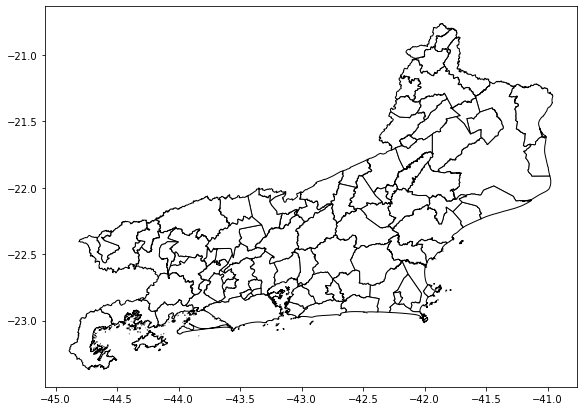

In [6]:
g_rj.plot(color='white', edgecolor='black', figsize=(10,7))

In [12]:
list(zip(dados['Longitude'], dados['Latitude']))

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.4775047, -23.0189271),
 (-43.2471087, -22.9335749),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.9225709),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982),
 (-43.1849587, -22.9706444),
 (-43.3548121, -23.0097423),
 (-49.0606445, -26.9225709),
 (-43.3461644, -22.938107),
 (-43.1819538, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.2808515, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.0191083),
 (-43.4590496, -23.023215),
 (-43.2339034, -22.9936095),
 (-43.1987716, -22.985368),
 (-43.2308106, -22.9771863),
 (-43.2525968, -22.9267666),
 (-51.92528, -14.235004),
 (-43.1852932, -22.9705243),
 (-43.4178323, -22.9990708),
 (-43.3079711, -23.0141101),
 (-43.350626, -22.988612),
 (-43.4152111, -22.9980081),
 (-43.199

In [7]:
geometry = [Point(x) for x in zip(dados['Longitude'], dados['Latitude'])]

In [8]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry)
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [9]:
def cria_dir(pasta:str, path='dados/processados/mapas'):
    '''
    Função para criar diretorios em um caminho especificado
    '''
    import os

    dir_ = f'{path}/{pasta}' 
    if not os.path.exists(dir_):
        os.makedirs(dir_)
    
    return dir_

In [10]:
diretorio = cria_dir('RJ-DATASET')
geo_dados.to_file(diretorio)

<AxesSubplot:>

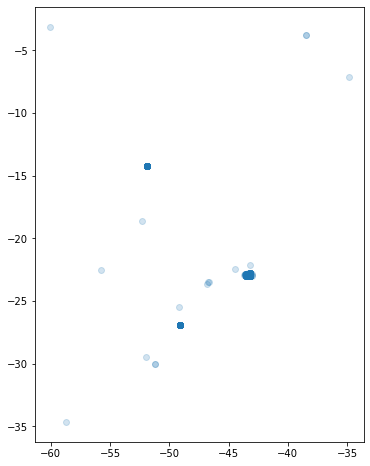

In [11]:
geo_dados.plot(figsize=(15,8), alpha=0.2)

In [12]:
g_rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Modificando o CRS para UTM

In [14]:
g_rj = g_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [15]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [16]:
g_rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [17]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [18]:
g_rj.to_file(diretorio+'/RJ-MUNIC.shp')
geo_dados.to_file(diretorio)

In [19]:
g_rj_novocrs = gpd.read_file('dados/processados/mapas/RJ-DATASET/RJ-MUNIC.shp')
geo_dados_novocrs = gpd.read_file('dados/processados/mapas/RJ-DATASET/RJ-DATASET.shp')

In [20]:
g_rj_novocrs = g_rj_novocrs[g_rj_novocrs['NM_MUN'] == 'Rio de Janeiro']
g_rj_novocrs

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((632.953 7457.528, 632.956 7457..."


### Comparando o CRS dos dois dataframes recarregados

In [21]:
geo_dados_novocrs.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
g_rj_novocrs.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#  Selecionando Pontos dentro de uma região

<AxesSubplot:>

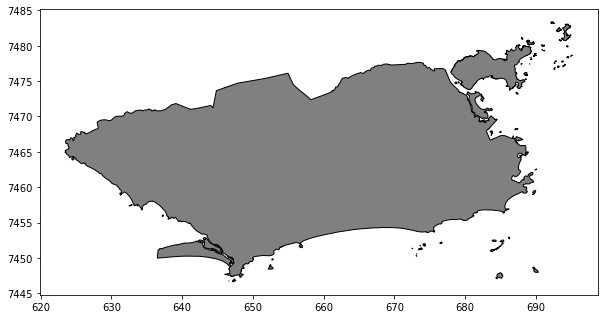

In [23]:
g_rj_novocrs.plot(color='grey', edgecolor='black', figsize=(10,7))

<AxesSubplot:>

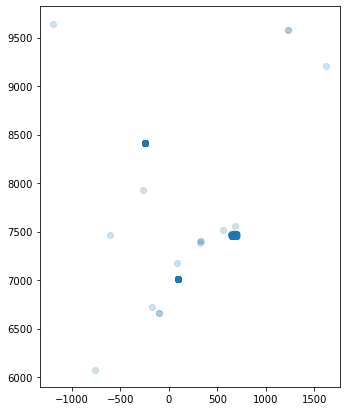

In [24]:
base = g_rj_novocrs.plot(color='grey', edgecolor='black', figsize=(10,7))
geo_dados_novocrs.plot(ax=base, figsize=(10,7), alpha=0.2)

In [25]:
g_rj_novocrs.iloc[0]

CD_MUN                                                3304557
NM_MUN                                         Rio de Janeiro
SIGLA_UF                                                   RJ
AREA_KM2                                             1200.329
geometry    (POLYGON ((632.9533136360549 7457.528059197341...
Name: 67, dtype: object

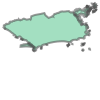

In [26]:
g_rj_novocrs.iloc[0]['geometry']

In [27]:
geo_dados_novocrs.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                      -23.016455
Longitude                                     -43.462946
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

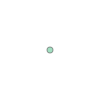

In [28]:
geo_dados_novocrs.iloc[0]['geometry']

In [29]:
geo_dados_novocrs.iloc[0]['geometry'].within(g_rj_novocrs.iloc[0]['geometry'])

True

In [30]:
g_rj_novocrs.iloc[0]['geometry'].contains(geo_dados_novocrs.iloc[0]['geometry'])

True

In [31]:
geo_dados_novocrs['geometry'].within(g_rj_novocrs.iloc[0]['geometry'])

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [32]:
amostra = geo_dados_novocrs.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679.746 7462.762)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685.278 7457.298)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248.715 8415.117)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687.096 7462.359)


<AxesSubplot:>

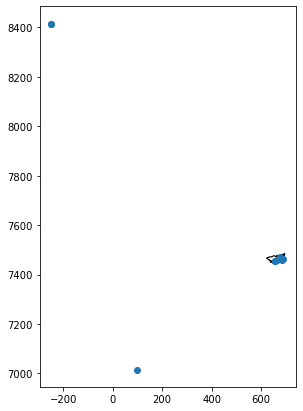

In [33]:
base = g_rj_novocrs.plot(color='white', edgecolor='black', figsize=(10,7))
amostra.plot(ax=base, figsize=(10,7), alpha=1)

In [34]:
antes = geo_dados_novocrs.shape[0]
antes

5000

In [35]:
geo_dados_novocrs = geo_dados_novocrs[geo_dados_novocrs['geometry'].within(g_rj_novocrs.iloc[0]['geometry'])]

In [36]:
depois = geo_dados_novocrs.shape[0]
antes - depois

487

<AxesSubplot:>

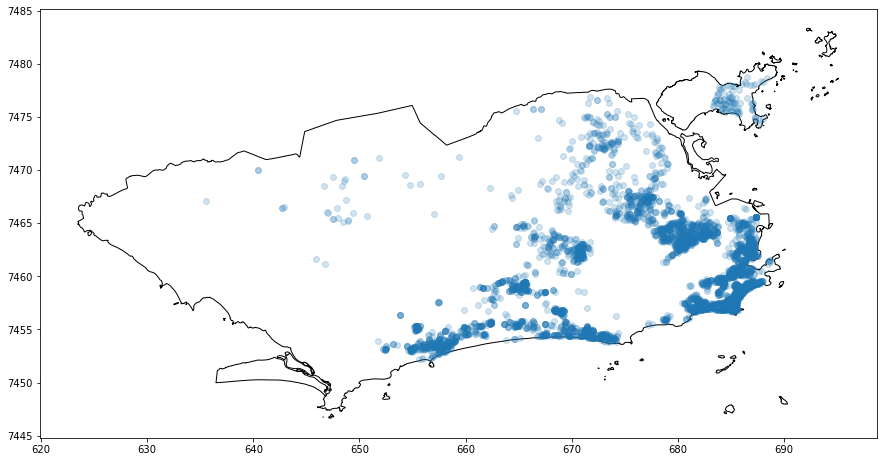

In [81]:
base = g_rj_novocrs.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados_novocrs.plot(ax=base, figsize=(10,7), alpha=0.2)

In [37]:
geo_dados_novocrs.to_file(diretorio)